In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


In [3]:
Matches=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\matches.csv',sep=str,delimiter=',')
p_home=np.array([])
p_away=np.array([])       #initialize

row_total=Matches.match_hometeam_score.count()
row_total-=Matches.match_hometeam_score.isna().sum()     #Don't include unfinished games into sample data

lambda_home=Matches.match_hometeam_score.sum()/row_total
lambda_away=Matches.match_awayteam_score.sum()/row_total

x_home=int(Matches['match_hometeam_score'].max())        #Maximum number of goals in a single game
x_away=int(Matches['match_awayteam_score'].max())


Expected number of games corresponding to 0 home goal(s) is 1001.6926
Expected number of games corresponding to 1 home goal(s) is 1605.2456
Expected number of games corresponding to 2 home goal(s) is 1286.2297
Expected number of games corresponding to 3 home goal(s) is 687.0752
Expected number of games corresponding to 4 home goal(s) is 275.2652
Expected number of games corresponding to 5 home goal(s) is 88.2243
Expected number of games corresponding to 6 home goal(s) is 23.5637
Expected number of games corresponding to 7 home goal(s) is 5.3945
Expected number of games corresponding to 8 home goal(s) is 1.0806


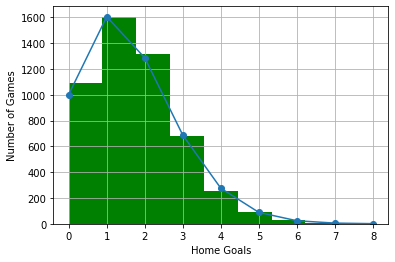

In [4]:
#plot the histogram of Home Goals
Matches.match_hometeam_score.hist(bins=9,color='green')
for i in range(x_home+1):
    p_h = poisson.pmf(i, lambda_home,loc=0)
    p_home = np.append(p_home,p_h*row_total)
    print('Expected number of games corresponding to '+ str(i)+ ' home goal(s) is ' +str(round(p_h*row_total,4)))
plt.plot(range(x_home+1), p_home,'-',marker='o', label='poisson pmf')
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.show()

In [5]:
#As it can be seen from Figure, Poisson Distribution is fitted to the Histogram.

Expected number of games corresponding to 0 away goal(s) is 1436.7257
Expected number of games corresponding to 1 away goal(s) is 1784.2088
Expected number of games corresponding to 2 away goal(s) is 1107.8667
Expected number of games corresponding to 3 away goal(s) is 458.6042
Expected number of games corresponding to 4 away goal(s) is 142.3803
Expected number of games corresponding to 5 away goal(s) is 35.3632
Expected number of games corresponding to 6 away goal(s) is 7.3193
Expected number of games corresponding to 7 away goal(s) is 1.2985


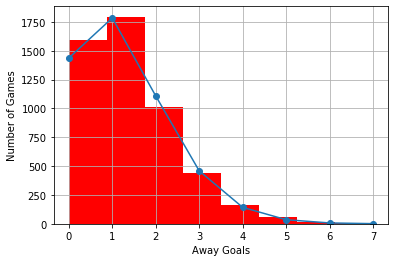

In [6]:
#plot the histogram of Away Goals
Matches.match_awayteam_score.hist(bins=8,color='red')
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
for i in range(x_away+1):
    p_a = poisson.pmf(i,lambda_away,loc=0)
    p_away= np.append(p_away,p_a*row_total)
    print('Expected number of games corresponding to ' + str(i) + ' away goal(s) is ' + str(round(p_a * row_total, 4)))
plt.plot(range(x_away+1), p_away,'-',marker='o', label='poisson pmf')
plt.show()

In [7]:
#As it can be seen from Figure, Poisson Distribution is fitted to the Histogram.

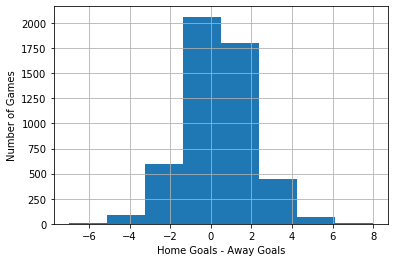

In [8]:
#plot the histogram of Home Goals - Away Goals
difference=Matches.match_hometeam_score-Matches.match_awayteam_score
difference.hist(bins=8)
plt.xlabel("Home Goals - Away Goals")
plt.ylabel("Number of Games")
plt.show()